# Задача 8

Решить жесткую систему уравнений по явной и неявной схемам Эйлера.

$$\begin{cases}
   u'(t) = 998 \; u + 1998 \; v \\
   v'(t) = -999 \; u - 1999 \; v
 \end{cases}$$
 

In [33]:
import math
import matplotlib.pyplot as plt
import numpy as np
import time

Явная схема Эйлера: 

$$ u_{n+1} = u_{n} + h f_u(t_n, u_n, v_n)$$
$$ v_{n+1} = v_{n} + h f_v(t_n, u_n, v_n)$$

Неявная схема Эйера:

$$ u_{n+1} = u_{n} + h f_u(t_{n+1}, u_{n+1}, v_{n+1})$$
$$ v_{n+1} = v_{n} + h f_v(t_{n+1}, u_{n+1}, v_{n+1})$$

In [34]:
a = 998
b = 1998
c = -999
d = -1999

def f_u(t, u, v):
    return a*u + b*v

def f_v(t, u, v):
    return c*u + d*v

In [35]:
t_start = 0
t_end = 1

u_start = 0.00001
v_start = 1

N = 5000
h = (t_end - t_start)/N
h

0.0002

### Аналитическое решение 

$$u(t) = 2\alpha \cdot e^{-t} + \beta \cdot e^{-1000t}$$ 

$$v(t) = -\alpha \cdot e^{-t} - \beta \cdot e^{-1000t}$$ 

$\alpha$ и $\beta$ из начальных данных:

$$\alpha = (u(t_0) + v(t_0)) \cdot e^{t_0}$$

$$\beta = - (u(t_0) + 2v(t_0)) \cdot e^{1000 t_0}$$

In [36]:
def solution(t_start, t_end, u_start, v_start, N):
    
    alpha = (u_start + v_start) * math.exp(t_start)
    beta = -1*(u_start + 2*v_start) * math.exp(1000*t_start)
    
    t_s = []
    u_s = []
    v_s = []
    
    h = (t_end - t_start)/N
    
    t_s.append(t_start)
    u_s.append(u_start)
    v_s.append(v_start)
    
    for i in range(1, N+1):
        t_s.append(t_start + i*h)
        u_s.append(2*alpha*math.exp(-1*t_s[i]) + beta*math.exp(-1000*t_s[i]))
        v_s.append(-1*alpha*math.exp(-1*t_s[i]) - beta*math.exp(-1000*t_s[i]))
        
    return t_s, u_s, v_s

In [37]:
t_sol, u_sol, v_sol = solution(t_start, t_end, u_start, v_start, N)

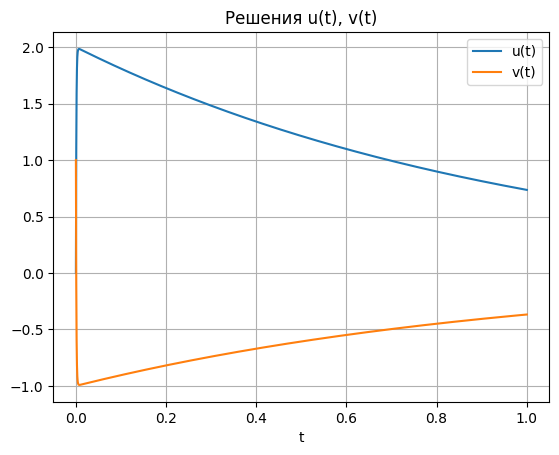

In [38]:
plt.plot(t_sol, u_sol,  label="u(t)")
plt.plot(t_sol, v_sol,  label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('Решения u(t), v(t)')
plt.legend()
plt.show()

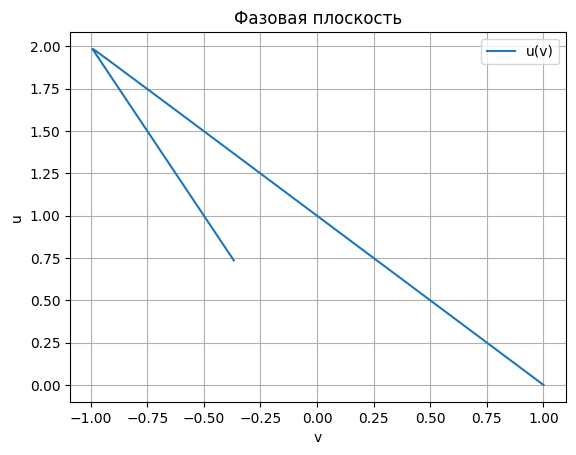

In [39]:
plt.plot(v_sol, u_sol, label="u(v)")
plt.grid()
plt.xlabel('v')
plt.ylabel('u')
plt.title('Фазовая плоскость')
plt.legend()
plt.show()

### Явная схема Эйлера

$$ u_{n+1} = u_{n} + h f_u(t_n, u_n, v_n)$$
$$ v_{n+1} = v_{n} + h f_v(t_n, u_n, v_n)$$

In [40]:
def euler_expl(f_1, f_2, t_start, t_end, u_start, v_start, N):
    
    tic = time.time()
    
    t_s = []
    u_s = []
    v_s = []
    
    h = (t_end - t_start)/N
    
    t_s.append(t_start)
    u_s.append(u_start)
    v_s.append(v_start)
    
    for i in range(1, N+1):
        t_s.append(t_start + i*h)
        u_s.append(u_s[i-1] + h*f_1(t=t_s[i-1], u=u_s[i-1], v=v_s[i-1]))
        v_s.append(v_s[i-1] + h*f_2(t=t_s[i-1], u=u_s[i-1], v=v_s[i-1]))
        
    toc = time.time()

    return t_s, u_s, v_s, (toc-tic)

In [78]:
n_array = np.arange(500, 5000, 100)
time_array = []
u_min_err_arr = []
v_min_err_arr = []
for n in n_array:
    t_expl, u_expl, v_expl, time_expl = euler_expl(f_u, f_v, t_start, t_end, u_start, v_start, n)
    err_v_expl = [abs(v_expl[i] - v_sol[i]) for i in range(len(v_expl))]
    err_u_expl = [abs(u_expl[i] - u_sol[i]) for i in range(len(u_expl))]
    u_min_err_arr.append(abs(max(err_u_expl)))
    v_min_err_arr.append(abs(max(err_v_expl)))
    time_array.append(time_expl)

In [79]:
print(u_min_err_arr)
time_expl

[3.6338796174657615, 2.9678762907990945, 2.492159628894332, 2.1353721324657613, 1.85787074635465, 1.635869637465761, 1.45423236655667, 1.3028679741324276, 1.2318614646050798, 1.1753243698322866, 1.1165575055225816, 1.0576959932992829, 0.9999923291115398, 0.9441613124334458, 0.8905862067319137, 0.8458286321378012, 0.8085292031649405, 0.7715327350373395, 0.7350782283289126, 0.6993367032107649, 0.6644271882544022, 0.6304291311117645, 0.5973919764007454, 0.5653425344467822, 0.5342906413930169, 0.5042335034165062, 0.47650738855279196, 0.4509528489634813, 0.4258975857294154, 0.4013616092167738, 0.3773580270492296, 0.35389433503183576, 0.33097348552519334, 0.30859477072017105, 0.2867545522651884, 0.26544686350832536, 0.24466390619834066, 0.22439645976802836, 0.204634218213118, 0.18536606699306657, 0.16658031023562936, 0.1484298750300448, 0.13091875267661934, 0.11374557665500529, 0.09690702342295832]


0.004639625549316406

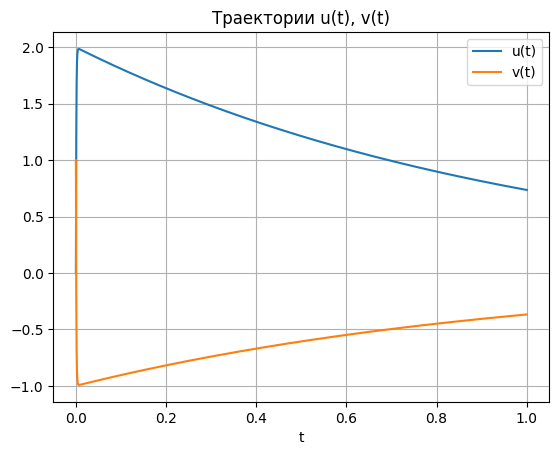

In [80]:
plt.plot(t_expl, u_expl, label="u(t)")
plt.plot(t_expl, v_expl, label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('Траектории u(t), v(t)')
plt.legend()
plt.show()

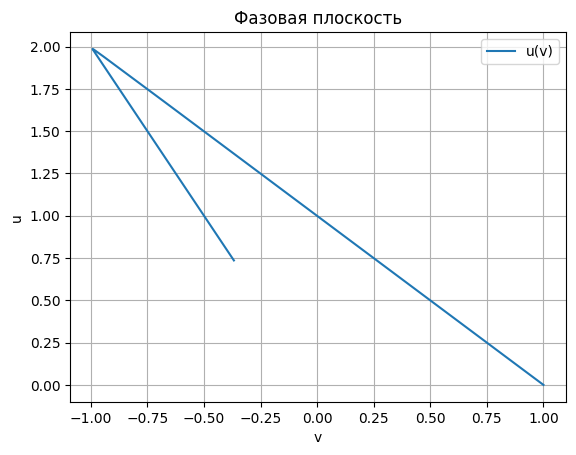

In [81]:
plt.plot(v_expl, u_expl, label="u(v)")
plt.grid()
plt.xlabel('v')
plt.ylabel('u')
plt.title('Фазовая плоскость')
plt.legend()
plt.show()

In [82]:
err_v_expl = [abs(v_expl[i] - v_sol[i]) for i in range(len(v_expl))]
err_u_expl = [abs(u_expl[i] - u_sol[i]) for i in range(len(u_expl))]

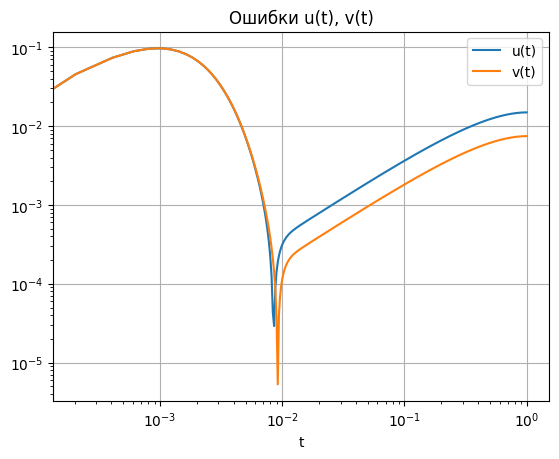

In [83]:
plt.plot(t_expl, err_u_expl,  label="u(t)")
plt.plot(t_expl, err_v_expl,  label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('Ошибки u(t), v(t)')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

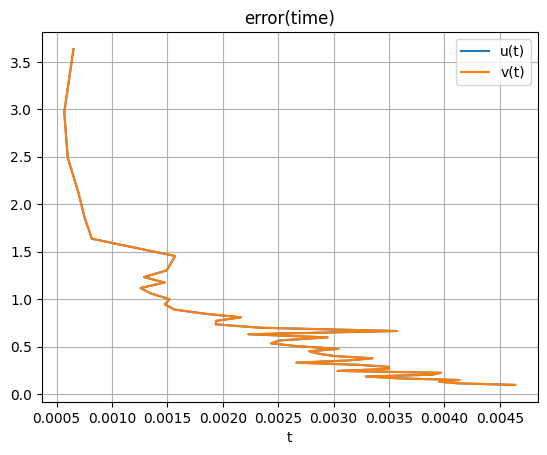

In [84]:
plt.plot(time_array, u_min_err_arr,  label="u(t)")
plt.plot(time_array, v_min_err_arr,  label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('error(time)')
#plt.yscale("log")
#plt.xscale("log")
plt.legend()
plt.show()

### Неявная схема Эйлера

$$ u_{n+1} = u_{n} + h f_u(t_{n+1}, u_{n+1}, v_{n+1})$$
$$ v_{n+1} = v_{n} + h f_v(t_{n+1}, u_{n+1}, v_{n+1})$$

Для решения этой системы, подставлю явный вид $f_u$ и $f_v$ - линейные функции. 

$$\begin{cases}
   u_{n+1} = u_{n} + h(a \; u_{n+1} + b \; v_{n+1}) \\
   v_{n+1} = v_{n} + h(c \; u_{n+1} + d \; v_{n+1})
 \end{cases}$$
 
 И перепишу в матричном виде:
 
 $$\begin{pmatrix}
1 - h a & -h b\\
-h c & 1 - h d
\end{pmatrix}
\begin{pmatrix}
u_{n+1}\\
v_{n+1}
\end{pmatrix} = 
\begin{pmatrix}
u_{n}\\
v_{n}
\end{pmatrix}
$$

Тогда решение сведется к решению СЛАУ

In [48]:
import scipy.linalg as sla

In [49]:
def euler_impl(f_1, f_2, t_start, t_end, u_start, v_start, N):
    
    tic = time.time()
    
    t_s = []
    u_s = []
    v_s = []
    
    h = (t_end - t_start)/N
    
    A = np.array([[1 - h*a, -1*h*b],[-1*h*c, 1 - h*d]])
    
    t_s.append(t_start)
    u_s.append(u_start)
    v_s.append(v_start)
    
    prev = np.array([u_start, v_start])
    
    for i in range(1, N+1):
        t_s.append(t_start + i*h)
        #cur = sla.solve(A, prev)
        cur = sla.inv(A).dot(prev)
        
        prev = cur
        
        u_s.append(cur[0])
        v_s.append(cur[1])
        
    toc = time.time()
    
    return t_s, u_s, v_s, (toc - tic)

In [50]:
t_impl, u_impl, v_impl, time_impl = euler_impl(f_u, f_v, t_start, t_end, u_start, v_start, N)

In [51]:
time_impl


0.05939197540283203

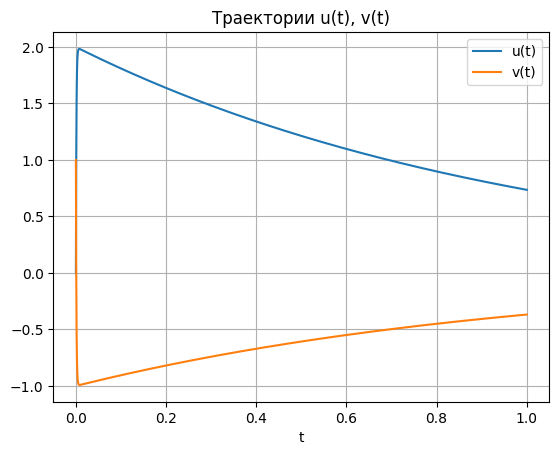

In [52]:
plt.plot(t_impl, u_impl, label="u(t)")
plt.plot(t_impl, v_impl,  label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('Траектории u(t), v(t)')
plt.legend()
plt.show()

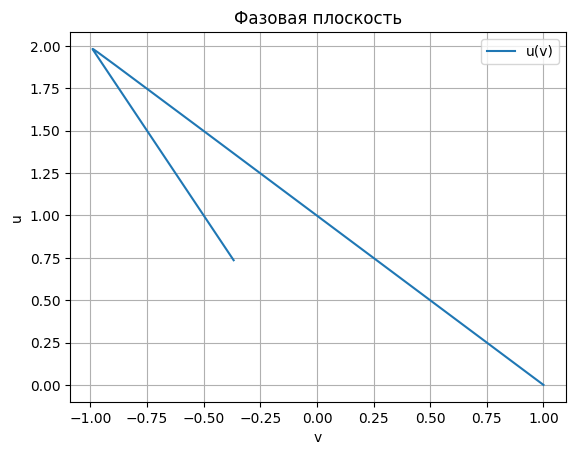

In [53]:
plt.plot(v_impl, u_impl, label="u(v)")
plt.grid()
plt.xlabel('v')
plt.ylabel('u')
plt.title('Фазовая плоскость')
plt.legend()
plt.show()

In [54]:
err_v_impl = [abs(v_impl[i] - v_sol[i]) for i in range(len(v_impl))]
err_u_impl = [abs(u_impl[i] - u_sol[i]) for i in range(len(u_impl))]

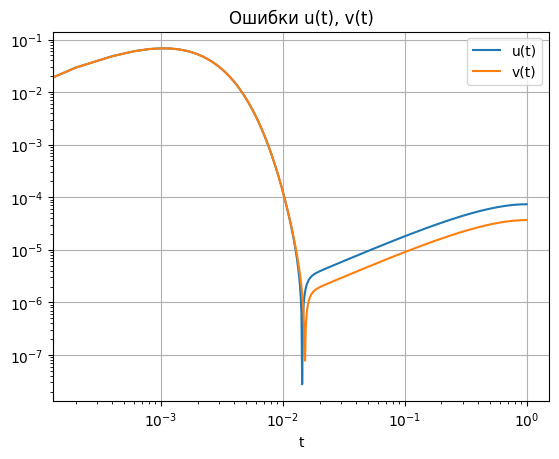

In [55]:
plt.plot(t_impl, err_u_impl,  label="u(t)")
plt.plot(t_impl, err_v_impl,  label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('Ошибки u(t), v(t)')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()